# **IRIS DATASET**

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray.

150 is the number of patterns (i.e. the number of examples)
4   is the number of features of each pattern. The features are: Sepal Length, Sepal Width, Petal Length and Petal    Width


Use sklear.dataset for loading the iris dataset. Try load it as pandas dataframe (have a look at the "as_frame" option).  Save the data attribute in the variable X, the target attribute in the variable y and the frame attribute in the variable dataframe.

In [1]:
import numpy as np
import sklearn.datasets

In [2]:
# I set as_frame=True to get a Panda DataFrame
d=sklearn.datasets.load_iris(return_X_y=False, as_frame=True)
# then I save the data as requested
x=d["data"]
y=d["target"]
dataframe=d["frame"]
print(x,y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns] 0      0
1      0
2      0
3      0
4   

Note that the targets (y) are numbers. Even though they should be names/string (i.e. Setosa, Versicolour, and Virginica). The encoding is:

0 -> Setosa

1 -> Versicolour

2 -> Virginica

Transform X and y into numpy arrays  (remeber the method to_numpy). Save the new arrays into variables with the same name (i.e. X and y)

In [3]:
import pandas as pd
x=x.to_numpy()
y=y.to_numpy()
print(type(x),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


Before any analysis we should look carefully our data, to see in there are correlations, missing values, etc. Plot the first column of X (sepal lenght) against the second column of X (sepal width). If you fell confident enough do the same plot for all the 3 possible targets (or use a color code).    REMEMBER TO IMPORT MATPLOTLIB

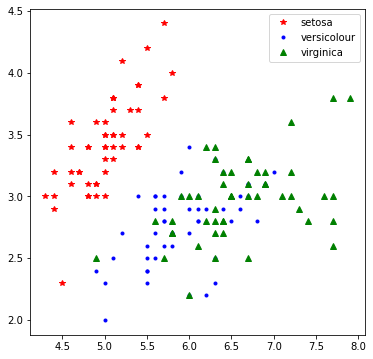

In [4]:
import matplotlib.pyplot as plt
# 0 -> setosa
#x0=[ x_i for i,x_i in enumerate(x[:,0]) if y[i]==0 ]
#y0=[ y_i for i,y_i in enumerate(x[:,1]) if y[i]==0 ]
setosa = y==0 # it's faster especially in bigger data      
x0 = x[setosa,0]
y0 = x[setosa,1]
# 1 -> versicolour
#x1=[ x_i for i,x_i in enumerate(x[:,0]) if y[i]==1 ]
#y1=[ y_i for i,y_i in enumerate(x[:,1]) if y[i]==1 ]
versicolor = y==1
x1 = x[versicolor,0]
y1 = x[versicolor,1]
# 2 -> virginica
#x2=[ x_i for i,x_i in enumerate(x[:,0]) if y[i]==2 ]
#y2=[ y_i for i,y_i in enumerate(x[:,1]) if y[i]==2 ]
virginica = y==2
x2 = x[virginica,0]
y2 = x[virginica,1]
fig,ax=plt.subplots(1,1,figsize=(6,6))
ax.plot(x0,y0,'*r',label='setosa')
ax.plot(x1,y1,'.b',label='versicolour')
ax.plot(x2,y2,'^g',label='virginica')
ax.legend()

We could investigate more about the data, but for now let's move on. I would recommend the python library seaborn for these tasks. Uncomment the following for a "nice" plot

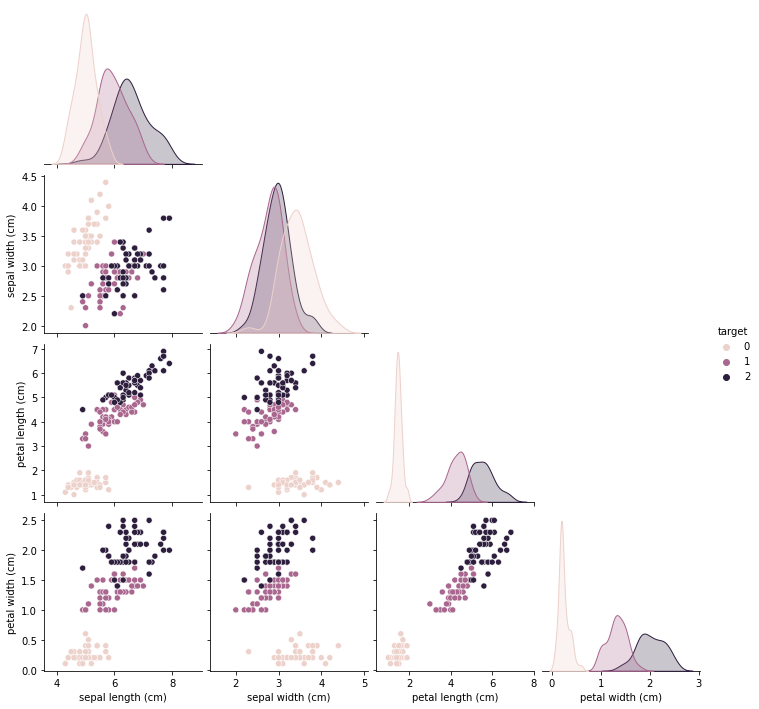

In [5]:
import seaborn as sns

sns.pairplot(dataframe,hue='target',diag_kind='kde',corner=True)


As a first step of our ML pipeling we want to preprocessing our data. Apply the sklearn.preprocessing.StandardScaler() to X. Save the scaled array into the variable X_scaled. If you want to try other scaler I would recommend MinMaxScaler, but you can have a look at the sklearn documentation.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

#### Check that X_scaled has know mean $\sim$ 0 and sigma $\sim$ 1, you can use numpy.mean and numpy.std. Remember that your data are 150 X 4... use the axis option!

In [7]:
print(np.mean(x_scaled),np.std(x_scaled))

-4.855375361027351e-16 1.0


Our aim is to train a classifier. We need to split the dataset (X_scaled,y) into train and test. For know let use 75% of the data for training at 25% for testing. (Hint: use sklearn.model_selection.train_test_split).  Save the new arrays respectively into X_train,X_test,y_train,y_test. 

In [8]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,train_size=0.75,shuffle=True)
# shuffling was needed because the data were ordered (first setosa, then
# vermicolor, then virginica)

Check if the number of rows in X_test plus the number of rows in X_train is equal to the number of row in X_scaled

In [9]:
print(y_train.size,'+',y_test.size,'=',y.size)

112 + 38 = 150


We are ready for training a classifier. Let's start simple and use KNN. Apply Sklearn.neighbors.KNeighborsClassifier() to our data. Remeber to fit the training data and test on the test data!

In [10]:
import sklearn.neighbors
KNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski',n_jobs=1)
KNN.fit(x_train,y_train)
y_predicted=KNN.predict(x_test)

Once you trained your classifier (apply the .fit method), check its prediction on X_test. Store the prediction into the variable y_predicted. Print and compare y_predicted and y_test. What happen if you change the hyperparameter "n_neighbors" in the classifier?

In [11]:
print((np.abs(y_predicted-y_test)).sum(),'is the number of times that the algorithm missed  - out of ',y_test.size)

2 is the number of times that the algorithm missed  - out of  38


our test set is small, and we can compare each element one by one, but let's try to use other metrics to evaluate the performance of our classifier, both on training and test sets. We could use sklearn.metrics.confusion_matrix()

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,KNN.predict(x_train))

array([[37,  0,  0],
       [ 0, 36,  2],
       [ 0,  2, 35]], dtype=int64)

In [13]:
confusion_matrix(y_test,y_predicted)

array([[13,  0,  0],
       [ 0, 12,  0],
       [ 0,  2, 11]], dtype=int64)

Repeat the last steps also for the other 2 classifier that we have seen at lecture ( i.e. sklearn.tree.DecisionTreeClassifier() , sklearn.neural_network.MLPClassifier() ) 

In [14]:
# for the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
tt =  DecisionTreeClassifier()
tt.fit(x_train,y_train)
y_predicted = tt.predict(x_test)
confusion_matrix(y_train,tt.predict(x_train))
confusion_matrix(y_test,y_predicted)

array([[13,  0,  0],
       [ 0, 11,  1],
       [ 0,  2, 11]], dtype=int64)

In [15]:
# for the MLP classifier
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier()
MLP.fit(x_train,y_train)
y_predicted = MLP.predict(x_test)
confusion_matrix(y_test,y_predicted)
confusion_matrix(y_train,MLP.predict(x_train))

C:\Users\ecica\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([[37,  0,  0],
       [ 0, 35,  3],
       [ 0,  2, 35]], dtype=int64)

Change the hyperparameters of the 3 classifier: n_neighbors in the KNN, hidden_layers in the MLP and max_depth in the tree. Performace improves or not? Who gives the best result? is there any case of overfitting?  You may want also to try different fractions in train_test_splitting, or the stratify option! 

# **SSDS**

In this exercise, we are going to use SDSS data to get some hands-on experience with machine learning. In the first exercise, we're going to train a classifier to distinguish stars from galaxies. This is an important problem, because many scientific questions depends on a clean data sets, and stars can be hard to distinguish from far-away galaxies. We don't want our study of galaxy evolution contaminated by stars in our own galaxy!

As a note in advance: none of the results you'll get out of this are science-worthy. This tutorial is meant to give you a first idea for how to set up your own machine learning model. But the first, and most important lesson, is this: **don't blindly trust your ML results.** 
As with any other science project, reporting or using results from a machine learning classifier or regressor requires careful understanding of the biases and caveats, assumptions and limitations that come with the data and algorithms chosen. Because the data sets you'll be using come straight out of the SDSS catalogue, you can expect there to be funny effects (both subtle and not) that may mess up any classification you'd want to do, and in a real-world setting, this would include understanding the limitations of the instrument and the data processing, before drawing any scientific conclusions from your procedure. 

With that out of the way, let's have some fun with machine learning! In this tutorial, we will use python and a library called `scikit-learn` to do our machine learning, `pandas` to deal with data structures, and `matplotlib` and `seaborn` to do our plotting. 

**Do not be worried, the section that uses seaborn are already compiled**

In [16]:
# make plots interactive and import plotting functionality
%matplotlib notebook
import matplotlib.pyplot as plt

# pretty plotting
import seaborn as sns

# my standard styles for plots
sns.set_style("whitegrid")
sns.set_context("talk")

# Always need numpy
import numpy as np

# data array operations
import pandas as pd

### Load the Data

Our first task is loading the data. For this exercise, we'll work with `sdss_dataset1.csv`. Your task is to find the correct file in this folder and load the data into a `pandas.DataFrame` (if you've never worked with pandas, take a look at the `read_csv` function). **Store the dataset in the variable comb**

In [17]:
data = pd.read_csv("sdss_dataset1.csv")

The `head` method on your loaded `DataFrame` gives you a quick overview of what's in your data.

**Exercise**: What columns do you recognize? Which ones are new to you? Which columns do you think will be su

In [18]:
data.head()

,objid,ra,dec,mag_u,mag_g,mag_r,mag_i,mag_z,spec_z,u_g_color,g_r_color,r_i_color,i_z_color,class
0,1237655499736023309,198.75865,-1.661133,19.28792,17.36450,16.65784,16.41547,16.26836,0.000057,1.881269,0.760563,0.201073,0.206329,STAR
1,1237655495977468550,198.69212,-1.551051,23.98161,21.48122,20.69408,19.68314,19.05251,-0.000028,2.914644,0.825191,0.962955,0.646452,STAR
2,1237655495977533617,198.86527,-1.521170,18.74677,17.72853,17.71136,17.71290,17.87158,0.000351,1.020382,0.024298,-0.013058,-0.148605,STAR
3,1237655495977533557,198.79422,-1.477119,19.93713,18.80160,18.82963,18.94912,19.04007,0.000199,1.160055,-0.032026,-0.119993,-0.069441,STAR
4,1237655495977533571,198.80730,-1.448024,19.15370,19.34383,19.69506,19.96842,20.05856,-0.000006,-0.200451,-0.347111,-0.271725,-0.108460,STAR


The SDSS is a survey that have observed galaxies in the local Universe. When you look at a galaxy with a telescope you collect photons coming from the galaxy. Photons have different energies and depending on your instrument you can observe only some specific part of the electromagnetic spectrum. 
In physics a specific Flux is measured in $Energy/s/m^2/Hz$. From the observational point of view fluxes are trasformed into magnitudes. Roughly speaking:

$$m \sim -2.5log_{10}{Flux}$$

The difference between magnitudes in 2 different bands is known as color. 

Now:
- objid is the name of the object (galaxy or star)
- ra and dec are position in the sky
- mag_u is the flux in the u-band (similarly for mag_g, mag_r). Google ugriz band sdss for more information
- spec_z is the redshift (i.e. the distance from us and the object)
- u_g_color is mag_u-mag_g and so on

Some quick lingo: In machine learning, the things we are trying to learn are often called **labels**, and the quantities we can use to learn them are **features**. For example, in some of the data sets, you're going to try and separate stars and galaxies by their magnitudes and colours. Here, for each **sample** in your data set, you have a bunch of magnitude and colour measurements, your features, and you're trying to predict whether that sample is a galaxy or a star, its label.

Note that in this case, we always need examples where we *know* the ground truth: we need to know the class really well. This is often not the case in astronomy (or, indeed, science): we often don't know exactly what our labels should be.

## Machine Learning With Messy Data

Let's start with something I told you *not* to do: we're just going to build a classifier and see how it does, without knowing too much of what's in the data. 

Normally, you wouldn't *start* by doing a classification, but for most of your data sets, there are some points we're going to make throughout this tutorial, so having a classification without knowing much about the data serves as a useful baseline. In general, though, running an ML algorithm comes at the end of *many* important steps, which is part of the point of this entire tutorial.

### Splitting the Data into a Training and Test Set

Our first task is to split the data into a training and a test data set. Pick the first 51% of the data and designate this as our training data set, and the remaining 49% of the DataFrame will be our test data set. This assigns a way higher fraction of data to the test data set than one normally would, but bear with me here. This entire example is a little contrived in the service of being instructional. :)

**Do it with slicing in order to be sure that data are not shuffled. Use the variables ntraining and ntest to do it  Save the targets slices in the variables X_train and X_test**

In [19]:
ntraining = int(len(data)*0.51)
ntest = int(len(data) - ntraining)

In [20]:
print("There are %i training samples."%ntraining)
print("There are %i test samples."%ntest)

There are 10200 training samples.
There are 9800 test samples.


In [21]:
X_train = data[:ntraining]
X_test = data[ntraining:]

Note: the thing you're classifying on should *not* be part of the array you use to classify, so remove the `class` column from the training arrays (but make sure you store it in a separate array first! (Hint: the pandas `drop` method comes in handy here)

**Advice**: It may be tempting to store the column with the label `class` in a variable `class`. Please don't! `class` is one of python's protected variable names, because it's used to set up a class. Similarly, you should not name a variable `def`: python might let you do it, but then you can never ever make a function again, because you used the keyword Python uses to create a function (i.e. when you type `def myfunction(...): ...` into a variable! There are a few of those to look out for, other examples include `list` and `lambda`. You will not believe how often I've named a list, well `list`, and could then no longer make any lists! Don't make my mistakes! :) 

**Keep The dataset without the "class" column in the variable X_train and X_test.
  Store the "class" column in a NUMPY variable classes
  Split (using slicing) the classes array into training and testing. Put the slices into the variable l_train,l_test**

In [22]:
classes = np.array(data["class"], dtype=str)

In [23]:
X_train = X_train.drop(["class"], axis=1)
X_test = X_test.drop(["class"], axis=1)

In [24]:
l_train = classes[:ntraining]
l_test = classes[ntraining:]

**Exercise**: Now let's set up a simple classifier. For this exercise, we're going to use a *KNN* classifier.

For now, use the default parameters, then train the algorithm on the training data and explore how well it does using the test data (take a look at the `score` method). Do you think it produces good results? 

**Hint**: Basically all algorithms implemented in scikit-learn have the same interface. Basically all of them have a `fit` method that will fit your data, a `predict` method that will predict the classes/values of new samples, and a `score` method that tells you something about how good your algorithm is at making predictions. Some algorithms also have a `transform` and a `fit_transform` method, which allows you to transform your features (e.g. dimensionality reduction algorithms like Principal Component Analysis). Many machine learning libraries outside of scikit-learn have adopted the same structure, which is super helpful when using these libraries for algorithms that are not implemented in scikit-learn. Learning how to do a workflow in scikit-learn is well worth the investment.

**We have not seen the .score method during lectures. If you prefere you may want to use a confusion matrix.**

In [25]:
from sklearn.neighbors import KNeighborsClassifier
lr = KNeighborsClassifier()

In [26]:
lr.fit(X_train, l_train)

KNeighborsClassifier()

In [27]:
lr.score(X_train, l_train)

0.9951960784313726

So the accuracy on the training is very high, but it seems like the model does nothing good on the test data set and manages to classify *every single* training example correctly.

Something strange is happening. Are we overfitting? Try to chage the number of K nearest neighbors. KNN is a very simple algorithm and it has no free parameters at all, which means that overfitting is basically not possible! 

Maybe you want to check your data!


Well, when I generated the data, I did a silly thing: 
* I downloaded 10,000 stars and 10,000 galaxies from SDSS
* I concatenated both together and stored them in a file
* Then we took the first 11,000 examples from that file and called it training data, and called the rest test data.

What does that do? Display the number of samples labelled "STAR" and those labelled "GALAXY" in both the training and test data set to find out. :) 
Hint: There are many ways you could do this, but casting the training and test labels into a `pandas.Series` object and using the `value_counts()` function gives you a pretty straightforward way of doing this.


In [28]:
pd.Series(l_train).value_counts()

STAR      10000
GALAXY      200
dtype: int64

In [29]:
pd.Series(l_test).value_counts()

GALAXY    9800
dtype: int64

From these numbers, it should be pretty obvious what happened: the training data has only 1000 galaxies compared to 50000 stars, but the test data set has *only* galaxies. That means that the training and test data sets are *massively* mismatched. 

How do we fix this? Well, we should have scrambled the order of our data before splitting training and test sets. 

**Use use train_test_split on the comb and classes variable. Use test_size=0.25 and shuffle=True. Overwrite the previously declared variables X_train, X_test, l_train, l_test. Remember to drop again the column "class" from X_train and X_test** 

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, l_train, l_test = train_test_split(data, classes,
                                                    train_size=0.75,
                                                    shuffle=True,
                                                    stratify=None)
X_train = X_train.drop(["class"], axis=1)
X_test = X_test.drop(["class"], axis=1)

Now take a look at the relative numbers of stars and galaxies in the train and test data sets. It should look a lot better:

In [31]:
pd.Series(l_train).value_counts()

STAR      7515
GALAXY    7485
dtype: int64

In [32]:
pd.Series(l_test).value_counts()

GALAXY    2515
STAR      2485
dtype: int64

**Exercise**: Let's train our KNN classifier again and see how it goes this time:

In [33]:
lr.fit(X_train, l_train)

KNeighborsClassifier()

In [34]:
lr.score(X_test, l_test)

0.8754

In [35]:
lr.score(X_train, l_train)

0.9060666666666667

That looks a lot better, but still not great. This, in part, is because we left out a bunch of crucial steps. Remember how I said **look at the data first**? Yeah, let's do a better job of this and start from the beginning:



## Machine Learning: From Start To Finish

I set a really bad example above by (1) asking you to run the algorithm on the data before we'd even looked at it, and (2) using the test data set before we were ready. The idea was to give you an idea to explore some of the things that can go wrong with your machine learning if you're not careful. We're now going to do better, and run through a typical machine learning workflow from start to finish.


### Figuring out your goal: Asking why!

The first step in *any* research project, but certainly in any machine learning project, is to define your goal. What are you going to do with your results? Are you trying to learn something about physics with your data set? Are you just trying to separate out good signals from bad ones? 

Unfortunately, many physics questions don't necessarily easily translate to a machine learning problem (this is often true for statistics as well). Going from "I want to know what dark matter is" to "run a random forest on SDSS photometric measurements" is really hard, and requires multiple iterations of reducing your *physics* question down to one that ML or statistics (or a combination of the two) can answer. It's well worth spending significant time at this stage, because this process will give you crucial insights about every step of your analysis procedure, from which columns in your data might be useful, to which dimensionality reduction algorithms might work, to the type of appropriate ML algorithm to use. 

One important question I've already implicitly answered for you above: Do you have ground-truth labels in your training data? That is, do you have data for which you are reasonably sure that the labels assigned to each sample are correct? Another question I've already implicitly answered: Do you have a **classification** or a **regression** problem. In a classification problem, you have categorical labels (e.g. "star", "galaxy", ...) that you try to assign to new samples. In a regression context, the variable you try to assign is continuous (e.g. redshift). 

Here are some additional questions you might want to think about at the very start, but also keep in mind throughout your analysis:
* Do you only care about the *predictions*, or do I also care about the *parameters*? That is, are you trying to learn something about the structure of the problem itself (e.g. physics), or do you just care that the predictions are right?
* How well does your training data match the samples for which you don't know the labels? Are they from the same survey/instrument? Are there significant differences between the data you can train on, and the data you want to classify? 
* What biases do you already know if in your training data? Is your survey flux-limited? Did the team making the catalogue only care about a particular funny type of Cataclysmic Variable and leave out another you might be interested in? Is there a part of feature space that's just not covered? 
* What physical knowledge do you have about your measurements? How can that physics knowledge guide you in selecting or constructing good features? 



### Feature Selection and Engineering

 Read it but we did not mention it during lesson, so you will not be asked to do anything that you do not know

One of the crucial parts of machine learning, and the part that you will likely spend most of the time on, is selecting and engineering features for training on. Features are, essentially, meaningful summaries of your data that are ideally designed such that they make classification and regression easy. In terms of the problems you're considering today, notice that the magnitudes we've extracted from the SDSS catalogue are not actual data. They're measurements derived from the *images* that the telescope took. 

There are machine learning algorithms that can take raw data, e.g. the pixel values in an image. The most popular type used especially in image recognition in recent years is the Convolutional Neural Network (CNN), which takes raw data and essentially internally learns what good representations of the data are.

CNNs have been enormously successful for a whole number of tasks, but it's worth pointing out that they're not always the ideal solution. They're big and very, very expensive to train (some of them can take weeks even on supercomputers!). If you have knowledge about the structure of your data and your problem, then it may be more efficient and reliable to use that knowledge to extract meaningful features. For example, we know that photons hit a CCD following a point spread function (PSF). We might not know that PSF very well, but if we do, there's no point making a neural network *learn* that a PSF exists; we can just extract magnitudes and work with them directly. So for any ML problem, it's worth thinking about what you know, and what you don't know. In cases where you *don't* know your PSF very well (or any number of things that may affect your measurements), it might be worth having your model learn that structure, but just take note that that's not universally true.

Let's now turn to the data you extracted. Earlier, you've taken a look at columns and might already have some ideas about which columns are useful for the star/galaxy classification project.

In any data set, you might have columns that are more useful than others! Let's find the ones we want to use for classification!

**Exercise**: Print the columns in your features table. What columns are there in your table? Are all of them useful for solving your problem? Reminder: you can look up what some of those columns mean [here](http://skyserver.sdss.org/dr14/en/help/browser/browser.aspx#&&history=description+SpecPhoto+V). 

**Exercise**: drop all columns that you don't think are useful (you may consider 'objid', 'ra', 'dec','spec_z', et least ask yourself why should I drop these columns? 'spec_z' is trickier, you could possibly take it into account).

In [36]:
data.columns

Index(['objid', 'ra', 'dec', 'mag_u', 'mag_g', 'mag_r', 'mag_i', 'mag_z',
       'spec_z', 'u_g_color', 'g_r_color', 'r_i_color', 'i_z_color', 'class'],
      dtype='object')

Out of those, we're going to remove the ones that don't correspond to a *physical property* of the source. That is, we'll remove the object ID `objid` and the coordinates `ra` and `dec`. We'll also remove the `spec_z` column, which describes the spectroscopic redshift (which either shouldn't exist or should not be trustworthy for the stars). 

For this exercise, I've made you columns that contain the colours as potentially useful classification features, but these might not exist in data sets that you encounter in research contexts. 

So here's a useful **hint** for the future: Feature engineering might include *combining* measurements into new features based on your domain knowledge of the problem you're trying to solve.

**Note**: for now, let's leave the `class` column in the data, which will help us with visualization later:

In [37]:
d = data.drop(labels=["objid", "ra", "dec", "spec_z"], axis=1)
d.head()

,mag_u,mag_g,mag_r,mag_i,mag_z,u_g_color,g_r_color,r_i_color,i_z_color,class
0,19.28792,17.36450,16.65784,16.41547,16.26836,1.881269,0.760563,0.201073,0.206329,STAR
1,23.98161,21.48122,20.69408,19.68314,19.05251,2.914644,0.825191,0.962955,0.646452,STAR
2,18.74677,17.72853,17.71136,17.71290,17.87158,1.020382,0.024298,-0.013058,-0.148605,STAR
3,19.93713,18.80160,18.82963,18.94912,19.04007,1.160055,-0.032026,-0.119993,-0.069441,STAR
4,19.15370,19.34383,19.69506,19.96842,20.05856,-0.200451,-0.347111,-0.271725,-0.108460,STAR



### Visualizing Feature Spaces

One of the most useful things you can do to star with is visualize your data! There are, of course, many different ways to visualize high-dimensional data. For example, you can make a histogram of the distributions for each feature (for classification problems, colour-coded by class works well), or you can make scatter plots or heatmaps of one feature against one another. You can also do both at the same time in what's called a *corner plot* or a *pair plot*. In python, the package [`seaborn`](https://seaborn.pydata.org/index.html) has a lot of nice visualizations pre-built to cut down the time you need to deal with nitty-gritty details of making complicated plots work.

**Exercise**: Try out ways to visualize your features. Take a look at the [`pairplot`](https://seaborn.pydata.org/examples/scatterplot_matrix.html) function in seaborn. In particular, it can be useful to set `hue="class"` to automatically plot separate distributions for `STAR` and `GALAXY` samples. For the classification problems, look for features that separate stars and galaxies well. For the regression, try to gauge by looking at the features how complex a model you'll likely need.

**Note**: a pairplot for *all* of the features will be pretty big: pick a subset you think might be informative with respect to classification, and then do a pairplot of those. It's also helpful to start by just plotting the first 1000 samples in your DataFrame if `pairplot` runs very slowly, and to set `diag_kind = "kde"`

**Hint**: This is a good time to scramble the order of the data, so let's do that first:

In [38]:
data = data.sample(frac=1, replace=False).reset_index(drop=True)

In [39]:
data.head()

,objid,ra,dec,mag_u,mag_g,mag_r,mag_i,mag_z,spec_z,u_g_color,g_r_color,r_i_color,i_z_color,class
0,1237655468065751260,236.92244,0.871160,22.52349,19.96891,18.68385,18.21181,17.77212,0.259509,2.819782,1.474937,0.517832,0.336985,GALAXY
1,1237655468602228750,235.92513,1.228224,18.33983,17.33497,17.24104,17.27568,17.34005,-0.000058,0.996931,0.080196,-0.031309,-0.059660,STAR
2,1237651297648902672,258.86825,62.662950,23.61070,22.25072,20.83097,20.06637,19.63689,0.000038,1.569443,1.389263,0.753485,0.463680,STAR
3,1237655499736547519,199.83727,-1.623109,21.05444,19.98852,19.49844,19.16392,18.85616,0.141629,1.267815,0.581440,0.355146,0.172796,GALAXY
4,1237651504880287924,203.41574,0.402945,21.15425,19.30217,18.43019,17.95992,17.62374,0.103617,1.976091,0.944853,0.425545,0.314903,GALAXY


In [40]:
sns.pairplot(data.loc[:1000, ["mag_u", "mag_g", "mag_r", "mag_i", "mag_z", "class"]], 
             kind = "scatter", diag_kind="kde", hue="class",
             plot_kws={"s":5, "alpha":0.4}, diag_kws={"alpha":0.5})

<IPython.core.display.Javascript object>

Let's also make one for the colours:

In [41]:
sns.pairplot(data.loc[:1000, ["u_g_color", "g_r_color", "r_i_color", "i_z_color", "class"]], 
             kind = "scatter", diag_kind="kde", hue="class",
             plot_kws={"s":5, "alpha":0.4}, diag_kws={"alpha":0.5})

<IPython.core.display.Javascript object>

You should see that there are values around -10000 for the colour and some of the magnitudes. This is because SDSS uses `-10000` as their placeholder for bad measurements, equivalent to the `NaN` ("not a number") you might see in other datasets. 

Let's remove all samples that have any -10000 value (there are ways to deal with missing data in machine learning, but we'll not learn about those today):

In [42]:
data_clean = data.loc[(data["mag_u"] > -1000) & (data["mag_r"] > -1000) & (data["mag_g"] > -1000) & (data["mag_i"] > -1000) & (data["mag_z"] > -1000)]

In [43]:
sns.pairplot(data_clean.loc[:1000, ["mag_u", "mag_g", "mag_r", "mag_i", "mag_z", "class"]], 
             hue="class", diag_kind="kde", plot_kws={"alpha":0.3, "s":5})

<IPython.core.display.Javascript object>

### Looking for Weird Things

One of the key tasks during this stage of your analysis is to *sanity-check* your data. Are there weird things? Instrumental artifacts? Things that don't look right? This is where you explore your data and try to find (and explain) these things, and potentially remove them before training.

Our star/galaxy data looks reasonably ok at this point, there are no longer any magnitudes that are wildly different from what we'd expect from either stars or galaxies in an optical survey like SDSS.



In [44]:
#for c in data_clean.columns[:-1]:
#    fig, ax = plt.subplots(1, 1, figsize=(8,4))
#    
#    sns.kdeplot(data=data_clean, x=c, ax=ax)
#    sns.rugplot(data=data_clean, x=c, ax=ax)
#    ax.set_title(c)

### Separate Out the Classes Again + Setting up training/testing splits

At this point, we should remove the 'class' column from the data again and set up our train/test splits. 

From now on, we'll *only* explore things on the training data, and ignore the test data until the very end.

Another important thing to think about is **stratification**: if your data set is very imbalanced, randomized splitting into training and test sets can lead to all examples of the smaller class ending up in one of the two sets, but not in both. Stratified splitting uses the class labels to ensure that examples of all classes end up in the training and test sets.

**Define your classes as the column "class" from the data_clean variable.
Remember now that we have definete data_clean and we should use it!!
Do train test splitting again with train_size=0.75, shuffle=True and if you want, consider stratification.
Save the variables into X_train, X_test, l_train, l_test. Remember to drop the "class" column from X_train and X_test.**


In [35]:
classes = data_clean["class"]

In [36]:
X_train, X_test, l_train, l_test = train_test_split(data_clean, classes, train_size=0.75, shuffle=True, stratify=None)
X_train = X_train.drop(["class"], axis=1)
X_test = X_test.drop(["class"], axis=1)


### Dimensionality Reduction

Another way to try and make sense of high-dimensional feature spaces is to perform *dimensionality reduction*. There are a lot of different ways to reduce the dimensionality of your features, and some are more useful than others, depending on the structure of your data and your problem. One idea with dimensionality reduction is to find the combination of features that gives you the most useful information in terms of your regression or classification problem. Some other times, all you want is a handy visualization in 2D, since humans in general aren't very good at thinking in higher-dimensional spaces.

[Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) is one of the most straightforward ways of reducing dimensionality (see also [here](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition) for alternative methods implemented in scikit-learn). One useful thing to try might be to project your features into a smaller space and see whether you still capture the information relevant in order to perform a good classification or regression.

**Exercise**: Use PCA to project your features into 2 dimensions, and compare with the full data space. Do you think most of the information in your features is captured by the 2D representation? 

**Hint**: The `fit_transform` method will come in handy here.

**Solution**: PCA is implemented in scikit-learn's `sklearn.decomposition` submodule:

Another way to visualize high-dimensional data is called *t-distributed stochastic neighbour embedding*, or, for short, t-SNE. [The paper](https://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf) is surprisingly readable for a computer science paper, and the method is generally pretty good at visualizing complex feature spaces (and you can spend some entertaining minutes letting your brain find fun things in the patterns it produces). 

One thing you have to be aware of, however, is that t-SNE *does not generalize to new examples*. Wheras methods like PCA can be trained on some data, and then the trained model applied to new samples, this is *not true* for t-SNE. So this is a method that's useful for visualization, but it doesn't necessarily produce features you want to use in your classification. Note that t-SNE is generally quite a slow algorithm, so running this on very large data sets might leave you waiting for a while (you can try running on a subset of the data if you don't want to wait)!

**Exercise**: Let's try it out! Visualize your feature space in 2 dimensions using t-SNE (hint: this is also implemented in scikit-learn).

### Scaling Features

Sometimes, your features vary wildly in order of magnitude. You may have photometric magnitudes that all lie between 13 and 20, but maybe you have a feature that's between 1 and 1,000,000, so that your different dimensions have vastly different scales. Some algorithms (e.g. random forests) can deal with that pretty well, but others can't. It's worth knowing enough about the algorithms you use whether they will deal with this kind of issue or not. If the method can't, one common solution is to re-scale the features such that they all have a mean of zero and a variance of one. 

Scikit-learn has a few ways of scaling features and other potentially useful steps for pre-processing data.

**Exercise**: Do you think scaling will help in your problem? Try scaling your features and re-running the PCA and t-SNE algorithms. Did your results change?

**Solution**:

In [37]:
#from sklearn.preprocessing import StandardScaler
#from sklearn.manifold import TSNE
#from sklearn.decomposition import PCA

In [38]:
#sc = StandardScaler()
#pca = PCA(n_components=2)
#ts = TSNE(n_components=2)

In [39]:
#X_scaled = sc.fit_transform(X_train)

In [40]:
#X_pca_sc = pca.fit_transform(X_scaled)

In [41]:
#X_tsne_sc = ts.fit_transform(X_scaled)

<IPython.core.display.Javascript object>


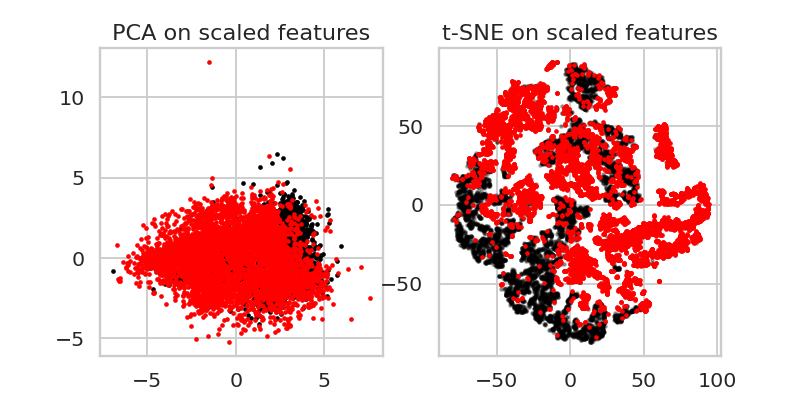

Text(0.5, 1.0, 't-SNE on scaled features')

In [42]:
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

#ax1.scatter(X_pca_sc[(l_train == "GALAXY"), 0], X_pca_sc[(l_train == "GALAXY"), 1], s=5, color="black")
#ax1.scatter(X_pca_sc[(l_train == "STAR"), 0], X_pca_sc[(l_train == "STAR"), 1], s=5, color="red")
#ax1.set_title("PCA on scaled features")

#ax2.scatter(X_tsne_sc[(l_train == "GALAXY"), 0], X_tsne_sc[(l_train == "GALAXY"), 1], s=5, color="black", alpha=0.3)
#ax2.scatter(X_tsne_sc[(l_train == "STAR"), 0], X_tsne_sc[(l_train == "STAR"), 1], s=5, color="red")
#ax2.set_title("t-SNE on scaled features")

## Picking a Machine Learning Algorithm to Start With

Which machine learning algorithm you choose for your problem depends, as we've discussed above, strongly on the type of problem you're trying to solve and the structure of the data. But even once you've decided whether you have a regression or classification problem, and whether it's an unsupervised or supervised one, there remain many algorithms to choose from!


One big question is how *interpretable* the model ought to be. Simpler algorithms are often easier to understand and the results more straightforward to interpret than from, say, a random forest (collection of trees). A general good suggestion is to start with the simplest model you think you can get away with, and only move to more complex models if your problem demands them.

Neural networks have been hugely successful in solving complex machine learning problems, in part because they can *learn* features rather than require the user to hand-craft them. While they do very well in many circumstances, be aware that this isn't *always* the case! These networks work really well (especially for image recognition) when you have no idea what your features ought to be, or there are things in your data that you can't model very easily (or that might be very expensive to model). However, if you understand the underlying structures in your data really well, then extracting physically meaningful features related to your problem can make your algorithm outperform those that need to learn these structures from scratch, or be faster to run.

There is another side to this, though: if you *don't* know structures in your data, then neural networks can be very powerful *emulators* of the process you're trying to model. This has been used, for example, for modelling detectors, where running physical simulations of these detectors would be hugely expensive.

**Exercise: For many problems, there isn't a single right algorithm.Try the following methods on the dataset I would recomment to work with scaled data, but not with PCA for now:**

* KNN
* Decision Trees 
* Multi Layer perceptron


### Hyperparameters

Before we go into actually applying a machine learning algorithm to our data, there is one more thing we need to think about: the hyperparameters! Here's where it gets a little confusing, though, so bear with me. All machine learning algorithms have parameters. For example, a neural network has *weights* for each of the connections between network nodes. However, basically all algorithms also have *hyperparameters*. For the K-Nearest Neighbour algorithm, one hyperparameter is the number of neighbours to use in order to determine the model value. For a decision tree, one hyperparameter is the depth. 

**Exercise**: Take a look at the hyperparameters for the algorithm you picked above. Which do you think are particularly useful? Are there any that don't make sense to you at all? 

**You have already done some preprocessing on the data. In order to be sure of dealing with the correct variable. Considere the dataframe "data_clean", drop the class column (since it is not a number). And apply to all the dataset a Standard scaling. After that you can now perform train test splitting!**

In [43]:
from sklearn.preprocessing import StandardScaler

classes = data_clean["class"]
data_clean = data_clean.drop(["class"],axis=1)

sc = StandardScaler()
data_clean_scaled = sc.fit_transform(data_clean)

X_train, X_test, l_train, l_test = train_test_split(data_clean_scaled, classes, train_size=0.75, shuffle=True, stratify=None)



**Apply now KNN decision trees and MLP to the scaled data**

Compare their score and if you have time search for different hyperparameters

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

KNN = KNeighborsClassifier(n_neighbors=5,
                           p=2,
                           metric='minkowski',
                           n_jobs=1)
KNN.fit(X_train,l_train)

y_predicted = KNN.predict(X_test)

print(KNN.score(X_train,l_train))
print(KNN.score(X_test,l_test))


0.9567567567567568
0.9369495596477182


In [57]:
confusion_matrix(l_train,KNN.predict(X_train),normalize='all')

array([[0.48188188, 0.01828495],
       [0.02495829, 0.47487487]])

In [58]:
confusion_matrix(l_test,KNN.predict(X_test),normalize='all')

array([[0.47477982, 0.02381906],
       [0.03923139, 0.46216974]])

In [47]:
from sklearn.tree import DecisionTreeClassifier

tt =  DecisionTreeClassifier()

tt.fit(X_train,l_train)

y_predicted = tt.predict(X_test)

print(tt.score(X_train,l_train))
print(tt.score(X_test,l_test))

1.0
0.9225380304243395


In [59]:
confusion_matrix(l_train,tt.predict(X_train),normalize='all')

array([[0.50016683, 0.        ],
       [0.        , 0.49983317]])

In [60]:
confusion_matrix(l_test,tt.predict(X_test),normalize='all')

array([[0.45896717, 0.03963171],
       [0.03783026, 0.46357086]])

In [49]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(verbose=True)
MLP.fit(X_train,l_train)
y_predicted = MLP.predict(X_test)


print(MLP.score(X_train,l_train))
print(MLP.score(X_test,l_test))

Iteration 1, loss = 0.62275967
Iteration 2, loss = 0.50522985
Iteration 3, loss = 0.43348018
Iteration 4, loss = 0.38098715
Iteration 5, loss = 0.34608121
Iteration 6, loss = 0.32269133
Iteration 7, loss = 0.30739331
Iteration 8, loss = 0.29464213
Iteration 9, loss = 0.28526097
Iteration 10, loss = 0.27764127
Iteration 11, loss = 0.27111369
Iteration 12, loss = 0.26581378
Iteration 13, loss = 0.26114834
Iteration 14, loss = 0.25630723
Iteration 15, loss = 0.25230976
Iteration 16, loss = 0.24861818
Iteration 17, loss = 0.24487963
Iteration 18, loss = 0.24146817
Iteration 19, loss = 0.23805189
Iteration 20, loss = 0.23519986
Iteration 21, loss = 0.23247627
Iteration 22, loss = 0.22996442
Iteration 23, loss = 0.22769656
Iteration 24, loss = 0.22565776
Iteration 25, loss = 0.22281075
Iteration 26, loss = 0.22033331
Iteration 27, loss = 0.21846368
Iteration 28, loss = 0.21617378
Iteration 29, loss = 0.21496731
Iteration 30, loss = 0.21243590
Iteration 31, loss = 0.21027925
Iteration 32, los

/home/ufficioastrofisici/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [61]:
confusion_matrix(l_train,tt.predict(X_train),normalize='all')

array([[0.50016683, 0.        ],
       [0.        , 0.49983317]])

In [62]:
confusion_matrix(l_test,tt.predict(X_test),normalize='all')

array([[0.45896717, 0.03963171],
       [0.03783026, 0.46357086]])